In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import re

In [ ]:
#NASA Exoplanet Archieve of WASP-17b
# https://exoplanetarchive.ipac.caltech.edu/overview/WASP-17b

In [8]:

df = pd.read_csv("wasp_17b_parameters.csv", header=None)
df = df.drop(columns=df.columns[0])
print(df)


                    1                              2                      3   \
0  Stassun et al. 2017          Patel & Espinoza 2022    Ivshina & Winn 2022   
1                    0                            ---                    ---   
2         86.63+/-0.42                            ---                    ---   
3  3.735430+/-0.000008  3.7354300+0.0000071-0.0000074  3.7354826+/-0.0000015   
4          1.87+/-0.24                            ---                    ---   
5                  ---                            ---                    ---   
6                  ---              0.180+0.130-0.100                    ---   
7                  ---           0.1218+0.0016-0.0014                    ---   
8                  ---                            ---                    ---   

                      4                    5                      6   \
0     Bonomo et al. 2017  Barstow et al. 2017  Sedaghati et al. 2016   
1                  0.020                  ---          

In [9]:
def read_df_params(df_param_list, df_ref_list, add_none=False):
    """
    Reading a row of literature values for a given parameter and converting 
    it into an array.

    Format that it will be converted to: [value, +error, -error]

    Format reading examples:
    "0.028+/-0.015" -> [0.028, 0.015, -0.015]
    "0.3+0.5-0.1" -> [0.3, 0.5, -0.1]
    "3.0" -> [3.0, 0.0, 0.0]


    Parameters
    ----------
    df_params_list : array_like, str
        Array of literature values of a given parameter.

    df_ref_list : array_like, str
        Array of authors/references that published the given parameter.

    add_none : bool
        False -> Only return values that authors have published
        True  -> Return all values     

    Returns
    -------
        param_list : ndarray
            An array of [value, +error, -error].
        
        ref_list : ndarray, str
            An array of authors.
    
    """

    param_list = []
    ref_list = []

    p_mask = np.where(df_param_list=="---", False, True) #Masking values

    for param, pmask, ref in zip(df_param_list, p_mask, df_ref_list):
        if pmask == True:
            if "+/-" in param: #If param in format "123+/-12"
                param = re.split('\+\/\-', param)
                param = [float(param[0]), float(param[1]), float('-' + param[1])]

            elif ("+" in param) and ("-" in param): #If param in format "123+12-23"
                if param[0] == "-": #If param value is negative
                    param = e[1:]
                    param_tmp = re.split('\+|\-', param)
                    param = [float(param_tmp[0]), float(param_tmp[1]), float('-' + param_tmp[1])]

                else: #param value is positive
                    param_tmp = re.split('\+|\-', param)
                    param = [float(param_tmp[0]), float(param_tmp[1]), float('-' + param_tmp[1])]
                    
            else: #If param value has no error
                param = [float(param), 0.0, 0.0]

            param_list.append(param)
            ref_list.append(ref)

        if (add_none == True) and (pmask == False):
            param_list.append(None)
            ref_list.append(ref)


    param_list = np.array(param_list)
    ref_list = np.array(ref_list)

    return [param_list, ref_list]
    

        

In [10]:
df_ref_list = df.loc[0]

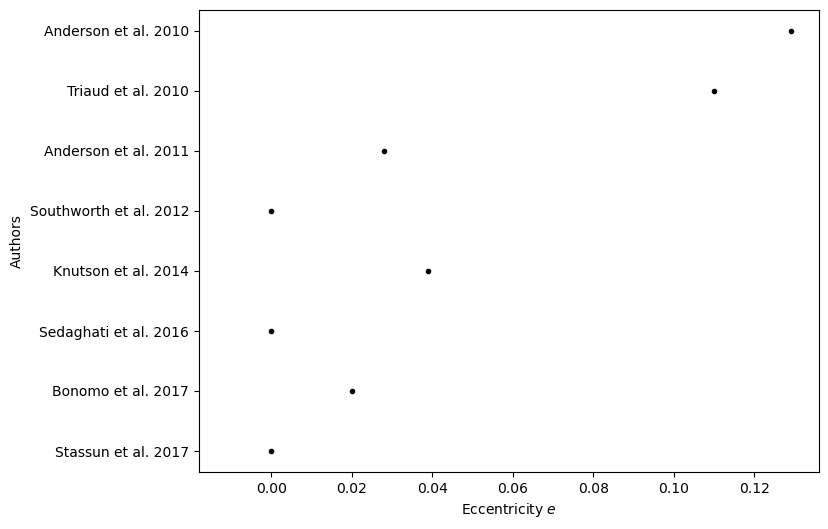

In [11]:
#Eccentricity
df_e_list = df.loc[1] #Eccentricty row

e_list, ref_list = read_df_params(df_e_list, df_ref_list)


y = range(0, len(ref_list))

fig, ax = plt.subplots(1, figsize=(8,6))

asymmetric_error = [e_list[:,1], e_list[:,2]]
plt.errorbar(e_list[:,0], y, xerr=asymmetric_error, fmt=".", color="black", ecolor="LightGrey", label="e")

plt.xlabel(r"Eccentricity $e$")
plt.ylabel("Authors")

ax.set_yticks(y)
ax.set_yticklabels(ref_list)

# ax.legend()
plt.show()


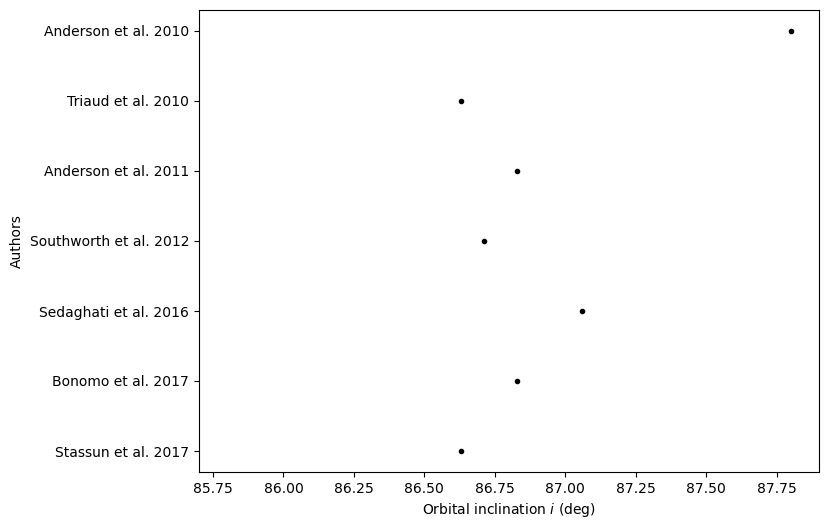

In [12]:
#Orbtial inclination

df_i_list = df.loc[2] #Orbtial inclination row

i_list, ref_list = read_df_params(df_i_list, df_ref_list)


y = range(0, len(ref_list))

fig, ax = plt.subplots(1, figsize=(8,6))

asymmetric_error = [i_list[:,1], i_list[:,2]]
plt.errorbar(i_list[:,0], y, xerr=asymmetric_error, fmt=".", color="black", ecolor="LightGrey", label="i")

plt.xlabel(r"Orbital inclination $i$ (deg)")
plt.ylabel("Authors")

ax.set_yticks(y)
ax.set_yticklabels(ref_list)

# ax.legend()
plt.show()

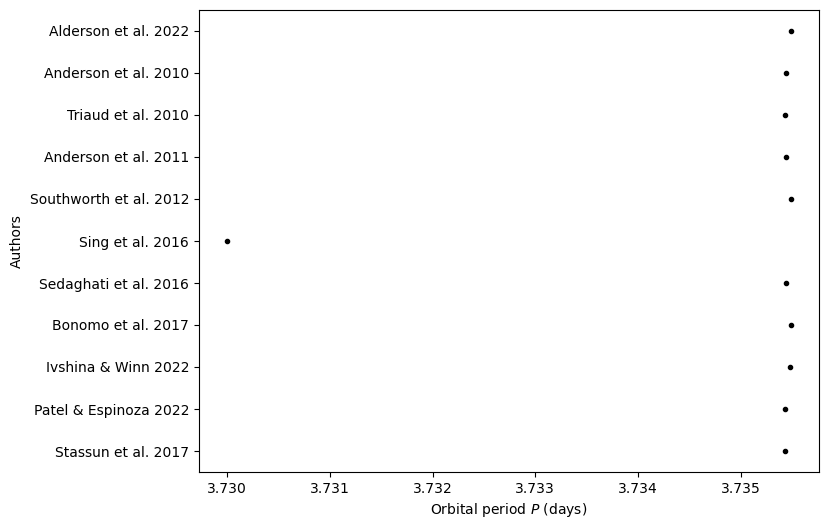

In [14]:
#Orbtial period

df_P_list = df.loc[3] #Orbtial period row

P_list, ref_list = read_df_params(df_P_list, df_ref_list)


y = range(0, len(ref_list))

fig, ax = plt.subplots(1, figsize=(8,6))

asymmetric_error = [P_list[:,1], P_list[:,2]]
plt.errorbar(P_list[:,0], y, xerr=asymmetric_error, fmt=".", color="black", ecolor="LightGrey", label="i")

plt.xlabel(r"Orbital period $P$ (days)")
plt.ylabel("Authors")

ax.set_yticks(y)
ax.set_yticklabels(ref_list)

# ax.legend()
plt.show()

In [28]:
#Planetary radius

df_R_list = df.loc[4] #Planetary radius row

R_list, ref_list = read_df_params(df_R_list, df_ref_list)


y = range(0, len(ref_list))

fig, ax = plt.subplots(1, figsize=(8,6))

asymmetric_error = [R_list[:,1], R_list[:,2]]
plt.errorbar(R_list[:,0], y, xerr=asymmetric_error, fmt=".", color="black", ecolor="LightGrey", label="i")

plt.xlabel(r'Planetary radius $R$ (R$_{Jup}$)')
plt.ylabel("Authors")

ax.set_yticks(y)
ax.set_yticklabels(ref_list)

# ax.legend()
plt.show()

ValueError: 
_{\text{Jup}}
  ^
Unknown symbol: \text, found '\'  (at char 2), (line:1, col:3)

<Figure size 800x600 with 1 Axes>